In [ ]:
#!/usr/bin/env python3
"""
Annual FWI Raw Values Analysis
Extracted from fwi_analysis_raw_values.ipynb
This script performs annual analysis of FWI raw values and generates plots.
"""

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cftime
from pathlib import Path

# Import utility functions
from ramip_fwi_utilities import (
read_zarr, 
apply_masks, 
weighted_horizontal_avg, 
create_global_map, 
create_global_map_grid
)


"""Main function to perform annual FWI raw values analysis."""

print("Starting Annual FWI Raw Values Analysis...")

# Create output directory for plots
output_dir = Path("annual_analysis_plots")
output_dir.mkdir(exist_ok=True)

# =============================================================================
# DATA LOADING - Historical
# =============================================================================
print("Loading historical data...")

# Load historical FWI data for each model
noresm2_historical_fwi = read_zarr('NorESM2-LM', 'historical', 'FWI',
                                start_analysis=cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                                end_analysis=cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_historical_fwi = read_zarr('SPEAR', 'historical', 'FWI',
                                start_analysis=cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                                end_analysis=cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_historical_fwi = read_zarr('MRI-ESM2-0', 'historical', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(1961, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(1990, 12, 31, 12, 0, 0, 0, has_year_zero=True))

# =============================================================================
# DATA LOADING - Future Scenarios
# =============================================================================
print("Loading future scenario data...")

# SSP3-7.0
noresm2_ssp370_fwi = read_zarr('NorESM2-LM', 'ssp370', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_ssp370_fwi = read_zarr('SPEAR', 'ssp370', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_ssp370_fwi = read_zarr('MRI-ESM2-0', 'ssp370', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

# Global aerosol reduction
noresm2_global_fwi = read_zarr('NorESM2-LM', 'ssp370-126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_global_fwi = read_zarr('SPEAR', 'ssp370-126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_global_fwi = read_zarr('MRI-ESM2-0', 'ssp370-126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

# SSP1-2.6
noresm2_ssp126_fwi = read_zarr('NorESM2-LM', 'ssp126', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_ssp126_fwi = read_zarr('SPEAR', 'ssp126', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_ssp126_fwi = read_zarr('MRI-ESM2-0', 'ssp126', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

# Regional aerosol reductions
noresm2_eas_fwi = read_zarr('NorESM2-LM', 'ssp370-eas126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_eas_fwi = read_zarr('SPEAR', 'ssp370-eas126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_eas_fwi = read_zarr('MRI-ESM2-0', 'ssp370-eas126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

noresm2_sas_fwi = read_zarr('NorESM2-LM', 'ssp370-sas126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_sas_fwi = read_zarr('SPEAR', 'ssp370-sas126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_sas_fwi = read_zarr('MRI-ESM2-0', 'ssp370-sas126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

noresm2_afr_fwi = read_zarr('NorESM2-LM', 'ssp370-afr126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_afr_fwi = read_zarr('SPEAR', 'ssp370-afr126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_afr_fwi = read_zarr('MRI-ESM2-0', 'ssp370-afr126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

noresm2_nae_fwi = read_zarr('NorESM2-LM', 'ssp370-nae126aer', 'FWI',
                            start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                            end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
spear_nae_fwi = read_zarr('SPEAR', 'ssp370-nae126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))
mri_nae_fwi = read_zarr('MRI-ESM2-0', 'ssp370-nae126aer', 'FWI',
                        start_analysis=cftime.DatetimeNoLeap(2041, 1, 1, 12, 0, 0, 0, has_year_zero=True),
                        end_analysis=cftime.DatetimeNoLeap(2050, 12, 31, 12, 0, 0, 0, has_year_zero=True))

# =============================================================================
# REGRID ALL DATA TO NORESM2-LM GRID
# =============================================================================
print("Regridding all data to NorESM2-LM grid...")

# Use NorESM2 global scenario as reference grid
reference_grid = noresm2_global_fwi

# Regrid historical data
spear_historical_fwi = spear_historical_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_historical_fwi = mri_historical_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

# Regrid future scenario data (NorESM2 is already on the correct grid)
spear_ssp370_fwi = spear_ssp370_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_ssp370_fwi = mri_ssp370_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_global_fwi = spear_global_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_global_fwi = mri_global_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_ssp126_fwi = spear_ssp126_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_ssp126_fwi = mri_ssp126_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_eas_fwi = spear_eas_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_eas_fwi = mri_eas_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_sas_fwi = spear_sas_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_sas_fwi = mri_sas_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_afr_fwi = spear_afr_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_afr_fwi = mri_afr_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

spear_nae_fwi = spear_nae_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)
mri_nae_fwi = mri_nae_fwi.interp(lat=reference_grid.lat, lon=reference_grid.lon)

print("Regridding complete!")

# =============================================================================
# CALCULATE ANNUAL MEANS
# =============================================================================
# Calculate annual means for historical data
print("Calculating historical annual means...")
noresm2_historical_fwi_mean = noresm2_historical_fwi.mean(dim=['time', 'member'], skipna=True)
spear_historical_fwi_mean = spear_historical_fwi.mean(dim=['time', 'member'], skipna=True)
mri_historical_fwi_mean = mri_historical_fwi.mean(dim=['time', 'member'], skipna=True)

# Combine models
multi_historical_fwi_mean = xr.concat([
    noresm2_historical_fwi_mean, 
    spear_historical_fwi_mean, 
    mri_historical_fwi_mean
], dim="model", coords='minimal')

historical_fwi_mean = multi_historical_fwi_mean.compute()
print("Historical FWI mean is ready")

# Calculate annual means for future scenarios
print("Calculating future scenario annual means...")

# SSP3-7.0
noresm2_ssp370_fwi_mean = noresm2_ssp370_fwi.mean(dim=['time', 'member'], skipna=True)
spear_ssp370_fwi_mean = spear_ssp370_fwi.mean(dim=['time', 'member'], skipna=True)
mri_ssp370_fwi_mean = mri_ssp370_fwi.mean(dim=['time', 'member'], skipna=True)

# Global
noresm2_global_fwi_mean = noresm2_global_fwi.mean(dim=['time', 'member'], skipna=True)
spear_global_fwi_mean = spear_global_fwi.mean(dim=['time', 'member'], skipna=True)
mri_global_fwi_mean = mri_global_fwi.mean(dim=['time', 'member'], skipna=True)

# SSP1-2.6
noresm2_ssp126_fwi_mean = noresm2_ssp126_fwi.mean(dim=['time', 'member'], skipna=True)
spear_ssp126_fwi_mean = spear_ssp126_fwi.mean(dim=['time', 'member'], skipna=True)
mri_ssp126_fwi_mean = mri_ssp126_fwi.mean(dim=['time', 'member'], skipna=True)

# Regional scenarios
noresm2_eas_fwi_mean = noresm2_eas_fwi.mean(dim=['time', 'member'], skipna=True)
spear_eas_fwi_mean = spear_eas_fwi.mean(dim=['time', 'member'], skipna=True)
mri_eas_fwi_mean = mri_eas_fwi.mean(dim=['time', 'member'], skipna=True)

noresm2_sas_fwi_mean = noresm2_sas_fwi.mean(dim=['time', 'member'], skipna=True)
spear_sas_fwi_mean = spear_sas_fwi.mean(dim=['time', 'member'], skipna=True)
mri_sas_fwi_mean = mri_sas_fwi.mean(dim=['time', 'member'], skipna=True)

noresm2_afr_fwi_mean = noresm2_afr_fwi.mean(dim=['time', 'member'], skipna=True)
spear_afr_fwi_mean = spear_afr_fwi.mean(dim=['time', 'member'], skipna=True)
mri_afr_fwi_mean = mri_afr_fwi.mean(dim=['time', 'member'], skipna=True)

noresm2_nae_fwi_mean = noresm2_nae_fwi.mean(dim=['time', 'member'], skipna=True)
spear_nae_fwi_mean = spear_nae_fwi.mean(dim=['time', 'member'], skipna=True)
mri_nae_fwi_mean = mri_nae_fwi.mean(dim=['time', 'member'], skipna=True)

# Combine models for each scenario
multi_ssp370_fwi_mean = xr.concat([
    noresm2_ssp370_fwi_mean, spear_ssp370_fwi_mean, mri_ssp370_fwi_mean
], dim="model", coords='minimal')
ssp370_fwi_mean = multi_ssp370_fwi_mean.compute()
print("SSP3-7.0 FWI mean is ready")

multi_global_fwi_mean = xr.concat([
    noresm2_global_fwi_mean, spear_global_fwi_mean, mri_global_fwi_mean
], dim="model", coords='minimal')
global_fwi_mean = multi_global_fwi_mean.compute()
print("Global aerosol reduction FWI mean is ready")

multi_ssp126_fwi_mean = xr.concat([
    noresm2_ssp126_fwi_mean, spear_ssp126_fwi_mean, mri_ssp126_fwi_mean
], dim="model", coords='minimal')
ssp126_fwi_mean = multi_ssp126_fwi_mean.compute()
print("SSP1-2.6 FWI mean is ready")

multi_eas_fwi_mean = xr.concat([
    noresm2_eas_fwi_mean, spear_eas_fwi_mean, mri_eas_fwi_mean
], dim="model", coords='minimal')
eas_fwi_mean = multi_eas_fwi_mean.compute()
print("East Asia aerosol reduction FWI mean is ready")

multi_sas_fwi_mean = xr.concat([
    noresm2_sas_fwi_mean, spear_sas_fwi_mean, mri_sas_fwi_mean
], dim="model", coords='minimal')
sas_fwi_mean = multi_sas_fwi_mean.compute()
print("South Asia aerosol reduction FWI mean is ready")

multi_afr_fwi_mean = xr.concat([
    noresm2_afr_fwi_mean, spear_afr_fwi_mean, mri_afr_fwi_mean
], dim="model", coords='minimal')
afr_fwi_mean = multi_afr_fwi_mean.compute()
print("Africa & Middle East aerosol reduction FWI mean is ready")

multi_nae_fwi_mean = xr.concat([
    noresm2_nae_fwi_mean, spear_nae_fwi_mean, mri_nae_fwi_mean
], dim="model", coords='minimal')
nae_fwi_mean = multi_nae_fwi_mean.compute()
print("North America & Europe aerosol reduction FWI mean is ready")

# =============================================================================
# APPLY MASKS AND CALCULATE GLOBAL AVERAGES
# =============================================================================
print("Applying masks and calculating global averages...")

# Apply masks for historical data
historical_fwi_mean_masked, _ = apply_masks(historical_fwi_mean, 
                                        get_significance=False,    
                                        get_land_mask=True,
                                        baseline_data=None)

# Calculate global average for historical
historical_fwi_mean_masked_globalavg = weighted_horizontal_avg(
    historical_fwi_mean_masked.mean('model'), 
    ensemble=False, 
    time=False
)

# =============================================================================
# PLOT HISTORICAL DATA
# =============================================================================
print("Creating historical plot...")

fig, ax = create_global_map(
    historical_fwi_mean_masked.mean('model'), 
    projection=ccrs.Robinson(),
    title="Historical (1961-1990)",
    colormap='Reds',
    colorbar_title="Fire Weather Index",
    textbox_text=f"{historical_fwi_mean_masked_globalavg.values.item():.2f}",
    figsize=(10.5, 6),
    vmin=0,
    vmax=40,
    extend='max',
    colorbar_levels=np.arange(0, 40.1, 4),
    contour_levels=None,
    hatching='///',
    regional_boundaries='ar6',
    hatching_style='overlay',
    hatching_data=None,
    show_gridlines=False
)

# Save historical plot
plt.savefig(output_dir / "historical_fwi_raw_values.png", dpi=300, bbox_inches='tight')
plt.close()
print(f"Historical plot saved to {output_dir / 'historical_fwi_raw_values.png'}")

# =============================================================================
# CALCULATE ANOMALIES
# =============================================================================
print("Calculating anomalies...")

ssp370_fwi_mean_anomaly = ssp370_fwi_mean - historical_fwi_mean
global_fwi_mean_anomaly = global_fwi_mean - historical_fwi_mean
ssp126_fwi_mean_anomaly = ssp126_fwi_mean - historical_fwi_mean
aer126eff_fwi_mean_anomaly = global_fwi_mean_anomaly - ssp370_fwi_mean_anomaly
ghg126eff_fwi_mean_anomaly = ssp126_fwi_mean_anomaly - global_fwi_mean_anomaly

eas_fwi_mean_anomaly = eas_fwi_mean - ssp370_fwi_mean
sas_fwi_mean_anomaly = sas_fwi_mean - ssp370_fwi_mean
afr_fwi_mean_anomaly = afr_fwi_mean - ssp370_fwi_mean
nae_fwi_mean_anomaly = nae_fwi_mean - ssp370_fwi_mean

# =============================================================================
# APPLY MASKS FOR ANOMALY ANALYSIS
# =============================================================================
print("Applying masks for anomaly analysis...")

# Apply masks for global average value (textbox on maps)
ssp370_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                    get_significance=False, 
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
global_fwi_mean_anomaly_masked_textbox, _ = apply_masks(global_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
ssp126_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
aer126eff_fwi_mean_anomaly_masked_textbox, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                        get_significance=False,
                                                        agreement_threshold=0.0,
                                                        threshold_type='minimum',
                                                        get_land_mask=True,
                                                        baseline_data=None)
ghg126eff_fwi_mean_anomaly_masked_textbox, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                        get_significance=False,
                                                        agreement_threshold=0.0,
                                                        threshold_type='minimum',
                                                        get_land_mask=True,
                                                        baseline_data=None)
eas_fwi_mean_anomaly_masked_textbox, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
sas_fwi_mean_anomaly_masked_textbox, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
afr_fwi_mean_anomaly_masked_textbox, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)
nae_fwi_mean_anomaly_masked_textbox, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                    get_significance=False,
                                                    agreement_threshold=0.0,
                                                    threshold_type='minimum',
                                                    get_land_mask=True,
                                                    baseline_data=None)

# Get latitudinally weighted global average
ssp370_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    ssp370_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
global_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    global_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
ssp126_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    ssp126_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
aer126eff_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    aer126eff_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
ghg126eff_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    ghg126eff_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
eas_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    eas_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
sas_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    sas_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
afr_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    afr_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)
nae_fwi_mean_anomaly_masked_globalavg = weighted_horizontal_avg(
    nae_fwi_mean_anomaly_masked_textbox.mean('model'), 
    ensemble=False, 
    time=False
)

# Apply masks for filled contour on maps
agreement_threshold = 0.66
threshold_type = 'minimum'

ssp370_fwi_mean_anomaly_masked_plot, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=ssp370_fwi_mean_anomaly)
global_fwi_mean_anomaly_masked_plot, _ = apply_masks(global_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=global_fwi_mean_anomaly)
ssp126_fwi_mean_anomaly_masked_plot, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=ssp126_fwi_mean_anomaly)
aer126eff_fwi_mean_anomaly_masked_plot, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=aer126eff_fwi_mean_anomaly)
ghg126eff_fwi_mean_anomaly_masked_plot, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=ghg126eff_fwi_mean_anomaly)
eas_fwi_mean_anomaly_masked_plot, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                get_significance=True,
                                                agreement_threshold=agreement_threshold,
                                                threshold_type=threshold_type,
                                                get_land_mask=True,
                                                baseline_data=eas_fwi_mean_anomaly)
sas_fwi_mean_anomaly_masked_plot, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                get_significance=True,
                                                agreement_threshold=agreement_threshold,
                                                threshold_type=threshold_type,
                                                get_land_mask=True,
                                                baseline_data=sas_fwi_mean_anomaly)
afr_fwi_mean_anomaly_masked_plot, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                get_significance=True,
                                                agreement_threshold=agreement_threshold,
                                                threshold_type=threshold_type,
                                                get_land_mask=True,
                                                baseline_data=afr_fwi_mean_anomaly)
nae_fwi_mean_anomaly_masked_plot, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                get_significance=True,
                                                agreement_threshold=agreement_threshold,
                                                threshold_type=threshold_type,
                                                get_land_mask=True,
                                                baseline_data=nae_fwi_mean_anomaly)

# Apply masks for hatching on maps
agreement_threshold = 0.67
threshold_type = 'maximum'

ssp370_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ssp370_fwi_mean_anomaly, 
                                                        get_significance=True,
                                                        agreement_threshold=agreement_threshold,
                                                        threshold_type=threshold_type,
                                                        get_land_mask=True,
                                                        baseline_data=ssp370_fwi_mean_anomaly)
global_fwi_mean_anomaly_masked_hatching, _ = apply_masks(global_fwi_mean_anomaly, 
                                                        get_significance=True,
                                                        agreement_threshold=agreement_threshold,
                                                        threshold_type=threshold_type,
                                                        get_land_mask=True,
                                                        baseline_data=global_fwi_mean_anomaly)
ssp126_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ssp126_fwi_mean_anomaly, 
                                                        get_significance=True,
                                                        agreement_threshold=agreement_threshold,
                                                        threshold_type=threshold_type,
                                                        get_land_mask=True,
                                                        baseline_data=ssp126_fwi_mean_anomaly)
aer126eff_fwi_mean_anomaly_masked_hatching, _ = apply_masks(aer126eff_fwi_mean_anomaly, 
                                                        get_significance=True,
                                                        agreement_threshold=agreement_threshold,
                                                        threshold_type=threshold_type,
                                                        get_land_mask=True,
                                                        baseline_data=aer126eff_fwi_mean_anomaly)
ghg126eff_fwi_mean_anomaly_masked_hatching, _ = apply_masks(ghg126eff_fwi_mean_anomaly, 
                                                        get_significance=True,
                                                        agreement_threshold=agreement_threshold,
                                                        threshold_type=threshold_type,
                                                        get_land_mask=True,
                                                        baseline_data=ghg126eff_fwi_mean_anomaly)
eas_fwi_mean_anomaly_masked_hatching, _ = apply_masks(eas_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=eas_fwi_mean_anomaly)
sas_fwi_mean_anomaly_masked_hatching, _ = apply_masks(sas_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=sas_fwi_mean_anomaly)
afr_fwi_mean_anomaly_masked_hatching, _ = apply_masks(afr_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=afr_fwi_mean_anomaly)
nae_fwi_mean_anomaly_masked_hatching, _ = apply_masks(nae_fwi_mean_anomaly, 
                                                    get_significance=True,
                                                    agreement_threshold=agreement_threshold,
                                                    threshold_type=threshold_type,
                                                    get_land_mask=True,
                                                    baseline_data=nae_fwi_mean_anomaly)

# =============================================================================
# CREATE ANOMALY PLOTS
# =============================================================================
print("Creating anomaly plots...")

# Main scenarios grid
data_list = [
    ssp370_fwi_mean_anomaly_masked_plot.mean('model'), 
    global_fwi_mean_anomaly_masked_plot.mean('model'), 
    ssp126_fwi_mean_anomaly_masked_plot.mean('model'),
    aer126eff_fwi_mean_anomaly_masked_plot.mean('model'),
    ghg126eff_fwi_mean_anomaly_masked_plot.mean('model')
]

title_list = ['SSP3-7.0', 
            'SSP1-2.6', 
            'SSP3-7.0 with Global Aerosol Reduction', 
            'Effect of Aerosol Emission Reduction', 
            'Effect of GHG Emission Reduction'
            ]

textbox_text_list = [
    f"{ssp370_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
    f"{global_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
    f"{ssp126_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
    f"{aer126eff_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
    f"{ghg126eff_fwi_mean_anomaly_masked_globalavg.values.item():.2f}"
]

hatching_data_list = [
    ssp370_fwi_mean_anomaly_masked_hatching.isel(model=0),
    global_fwi_mean_anomaly_masked_hatching.isel(model=0),
    ssp126_fwi_mean_anomaly_masked_hatching.isel(model=0),
    aer126eff_fwi_mean_anomaly_masked_hatching.isel(model=0),
    ghg126eff_fwi_mean_anomaly_masked_hatching.isel(model=0)
]

vmins_list = [-3, -3, -3, -1, -1]
vmaxs_list = [3, 3, 3, 1, 1]

colorbar_levels_list = [np.arange(-3, 3.1, 0.3), np.arange(-3, 3.1, 0.3), np.arange(-3, 3.1, 0.3), 
                        np.arange(-1, 1.1, 0.1), np.arange(-1, 1.1, 0.1)
                        ]

fig, axes = create_global_map_grid(
    data_list, 
    rows=2, 
    cols=3,
    main_title=None,
    projection=ccrs.Robinson(),
    titles=title_list,
    colormaps='RdBu_r',
    colorbar_titles="Δ Fire Weather Index",
    textbox_texts=textbox_text_list,
    # figsize=(20, 14),
    vmins=vmins_list,
    vmaxs=vmaxs_list,
    extends='both',
    colorbar_levels=colorbar_levels_list,
    hatchings='///',
    regional_boundaries='ar6',
    hatching_styles='overlay',
    hatching_data=hatching_data_list,
    show_gridlines=False,
    ramip_regions=False,
)

# Save main scenarios plot
plt.savefig(output_dir / "fwi_anomalies_main_scenarios.png", dpi=600, bbox_inches='tight')
plt.close()
print(f"Main scenarios plot saved to {output_dir / 'fwi_anomalies_main_scenarios.png'}")

# Regional scenarios grid
regional_data_list = [eas_fwi_mean_anomaly_masked_plot.mean('model'), nae_fwi_mean_anomaly_masked_plot.mean('model'), 
                    sas_fwi_mean_anomaly_masked_plot.mean('model'), afr_fwi_mean_anomaly_masked_plot.mean('model'),
                    ]

regional_title_list = ['Effect of East Asian Aerosol Reduction', 
                    'Effect of North American & European Aerosol Reduction', 
                    'Effect of South Asian Aerosol Reduction', 
                    'Effect of African & Middle Eastern Aerosol Reduction']

regional_textbox_text_list = [f"{eas_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                            f"{nae_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                            f"{sas_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                            f"{afr_fwi_mean_anomaly_masked_globalavg.values.item():.2f}",
                ]

regional_hatching_data_list = [eas_fwi_mean_anomaly_masked_hatching.isel(model=0),
                            nae_fwi_mean_anomaly_masked_hatching.isel(model=0),
                            sas_fwi_mean_anomaly_masked_hatching.isel(model=0),
                            afr_fwi_mean_anomaly_masked_hatching.isel(model=0),
                ]

regional_vmins_list = [-0.5, -0.5, -0.5, -0.5]
regional_vmaxs_list = [0.5, 0.5, 0.5, 0.5]

regional_colorbar_levels_list = [np.arange(-0.5, 0.51, 0.05), np.arange(-0.5, 0.51, 0.05),
                                np.arange(-0.5, 0.51, 0.05), np.arange(-0.5, 0.51, 0.05)]

fig, axes = create_global_map_grid(
    regional_data_list, 
    rows=2, 
    cols=2,
    main_title=None,
    projection=ccrs.Robinson(),
    titles=regional_title_list,
    colormaps='RdBu_r',
    colorbar_titles="Δ Fire Weather Index",
    textbox_texts=regional_textbox_text_list,
    # figsize=(20, 14),
    vmins=regional_vmins_list,
    vmaxs=regional_vmaxs_list,
    extends='both',
    colorbar_levels=regional_colorbar_levels_list,
    hatchings='///',
    regional_boundaries='ar6',
    hatching_styles='overlay',
    hatching_data=regional_hatching_data_list,
    show_gridlines=False,
    ramip_regions=['east_asia', 'north_america_europe', 'south_asia', 'africa_mideast'],
)

# Save regional scenarios plot
plt.savefig(output_dir / "fwi_anomalies_regional_scenarios.png", dpi=600, bbox_inches='tight')
plt.close()
print(f"Regional scenarios plot saved to {output_dir / 'fwi_anomalies_regional_scenarios.png'}")

print("Annual FWI Raw Values Analysis complete!")
print(f"All plots saved to: {output_dir}")




Starting Annual FWI Raw Values Analysis...
Loading historical data...
Loading future scenario data...
Regridding all data to NorESM2-LM grid...
Regridding complete!
Calculating historical annual means...
Historical FWI mean is ready
Calculating future scenario annual means...
SSP3-7.0 FWI mean is ready
Global aerosol reduction FWI mean is ready
SSP1-2.6 FWI mean is ready
East Asia aerosol reduction FWI mean is ready
South Asia aerosol reduction FWI mean is ready
Africa & Middle East aerosol reduction FWI mean is ready
North America & Europe aerosol reduction FWI mean is ready
Applying masks and calculating global averages...
Creating historical plot...


/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Historical plot saved to annual_analysis_plots/historical_fwi_raw_values.png
Calculating anomalies...
Applying masks for anomaly analysis...
Creating anomaly plots...


/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyterhub/miniconda-persad/envs/lab/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/hom

Main scenarios plot saved to annual_analysis_plots/fwi_anomalies_main_scenarios.png


ValueError: Parameter list length (5) must be either 1 or 4

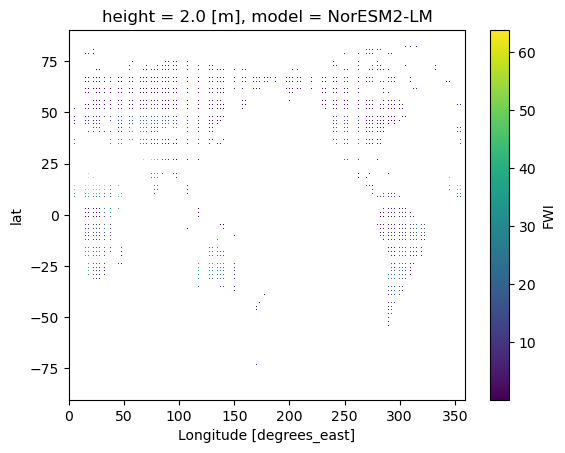

In [29]:
historical_fwi_mean_masked.isel(model=0).plot()

In [32]:
eas_fwi_mean_anomaly_masked_plot

<xarray.DataArray 'FWI' (model: 3, lat: 96, lon: 144)> Size: 332kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], shape=(3, 96, 144))
Coordinates:
    height   float64 8B 2.0
  * lat      (lat) float64 768B -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon      (lon) float64 1kB 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * model    (model) <U10 120B 'NorESM2-LM' 'SPEAR' 'MRI-ESM2-0'